# Task 2: Understand body language by gesture recognition with convolutional neural network

## 1. Do literature search on Convolution Neural Network. Learn how to build a convolutional layer in PyTorch.

## 2. Referring to the guide in Task 1, build your own network for gesture classification using convolutional layers. Please see the references 4 in the manual to learn how to build convolutional layers in PyTorch.

## 3. Analyse and comment on the performance of the model. Make a comparison between the fully connected based and convolutional based models and comment on it.

In [1]:
%matplotlib inline
import cv2
import numpy as np
import os
import itertools
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.utils.data as utils_data

In [2]:
Image = []
path_images = './dataset/images'
for mainDir, subDir, fileList in os.walk(path_images):
    for file in fileList:
        currentPath = os.path.join(mainDir, file)
        Image.append(cv2.resize(cv2.imread(currentPath), (96, 96)))
Image = np.array(Image)
Image = np.transpose(Image, (0, 3, 1, 2))
dataset_size, C, H, W = Image.shape
# for FCNN model, the image need to be stretched into one dimension: (b, h, w)->(b, h*w)
print (Image.shape)


Label = []
path_labels = './dataset_processed/labels'
for file in os.listdir(path_labels):
    Label.append(np.loadtxt(os.path.join(path_labels, file)))
Label = np.array(list(itertools.chain.from_iterable(Label)))
num_classes = int(np.max(Label))+1
print(num_classes)

error: OpenCV(4.8.0) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [3]:
class CNN(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN, self).__init__()
        self.l1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.l2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.l3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Sequential(
            nn.Dropout(0.6),  
            nn.Linear(128*12*12, 1024),
            nn.ReLU())  
        self.fc2 = nn.Sequential(
            nn.Dropout(0.6),  
            nn.Linear(1024, 1024),
            nn.ReLU())  
        self.fc3 = nn.Linear(1024,num_classes)
    def forward(self,x):
        x = self.l1(x)
        x = self.l2(x)
        x = self.l3(x)
        x = x.reshape(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        out = self.fc3(x)
        return out
        

In [4]:
device = torch.device("mps")
model = CNN().to(device)
# if torch.cuda.is_available():
#     model = model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
loss_func = nn.CrossEntropyLoss()

For apple silicon, the default is mps.

In [5]:
print(model)

CNN(
  (l1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (l2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (l3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Dropout(p=0.6, inplace=False)
    (1): Linear(in_features=18432, out_features=1024, bias=True)
    (2): ReLU()
  )
  (fc2): Sequential(
    (0): Dropout(p=0.6, inplace=False)
    (1): Linea

In [12]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [25]:
dataset = utils_data.TensorDataset(torch.Tensor(Image), torch.LongTensor(Label))
split_ratio = 0.8
train_size = int(split_ratio * dataset_size)
test_size = dataset_size - train_size
train_set, test_set = utils_data.random_split(dataset, [train_size, test_size])
train_loader = utils_data.DataLoader(dataset=train_set, batch_size=8, shuffle=True)
test_loader = utils_data.DataLoader(dataset=test_set, batch_size=8, shuffle=True)
print('Data is ready!')

Data is ready!


epoch=0	train loss=5.184084	train accuracy=0.274	test accuracy=0.375
epoch=1	train loss=2.556763	train accuracy=0.387	test accuracy=0.375
epoch=2	train loss=1.689785	train accuracy=0.661	test accuracy=0.812
epoch=3	train loss=0.883704	train accuracy=0.694	test accuracy=0.750
epoch=4	train loss=0.532271	train accuracy=0.790	test accuracy=0.812
epoch=5	train loss=0.760544	train accuracy=0.774	test accuracy=0.812
epoch=6	train loss=0.633548	train accuracy=0.774	test accuracy=0.812
epoch=7	train loss=0.464177	train accuracy=0.806	test accuracy=0.812
epoch=8	train loss=0.542664	train accuracy=0.839	test accuracy=0.812
epoch=9	train loss=0.443658	train accuracy=0.839	test accuracy=0.875
epoch=10	train loss=0.589737	train accuracy=0.742	test accuracy=0.750
epoch=11	train loss=0.432291	train accuracy=0.855	test accuracy=0.812
epoch=12	train loss=0.438927	train accuracy=0.855	test accuracy=0.812
epoch=13	train loss=0.564940	train accuracy=0.855	test accuracy=0.812
epoch=14	train loss=0.465191	t

epoch=117	train loss=0.122438	train accuracy=0.935	test accuracy=0.500
epoch=118	train loss=0.359101	train accuracy=0.952	test accuracy=0.625
epoch=119	train loss=0.144828	train accuracy=0.952	test accuracy=0.812
epoch=120	train loss=0.019636	train accuracy=1.000	test accuracy=0.875
epoch=121	train loss=0.021899	train accuracy=1.000	test accuracy=0.812
epoch=122	train loss=0.157183	train accuracy=0.919	test accuracy=0.812
epoch=123	train loss=0.130839	train accuracy=0.952	test accuracy=0.688
epoch=124	train loss=0.113577	train accuracy=0.984	test accuracy=0.812
epoch=125	train loss=0.038222	train accuracy=1.000	test accuracy=0.812
epoch=126	train loss=0.168108	train accuracy=0.968	test accuracy=0.750
epoch=127	train loss=0.062877	train accuracy=0.984	test accuracy=0.688
epoch=128	train loss=0.093775	train accuracy=0.984	test accuracy=0.750
epoch=129	train loss=0.065531	train accuracy=0.984	test accuracy=0.812
epoch=130	train loss=0.094843	train accuracy=0.984	test accuracy=0.812
epoch=

epoch=233	train loss=0.083302	train accuracy=0.968	test accuracy=0.625
epoch=234	train loss=0.068950	train accuracy=0.984	test accuracy=0.625
epoch=235	train loss=0.064779	train accuracy=0.984	test accuracy=0.625
epoch=236	train loss=0.014288	train accuracy=0.984	test accuracy=0.625
epoch=237	train loss=0.058844	train accuracy=0.968	test accuracy=0.750
epoch=238	train loss=0.031485	train accuracy=0.984	test accuracy=0.812
epoch=239	train loss=0.072856	train accuracy=0.984	test accuracy=0.750
epoch=240	train loss=0.023175	train accuracy=1.000	test accuracy=0.812
epoch=241	train loss=0.032953	train accuracy=0.984	test accuracy=0.750
epoch=242	train loss=0.057255	train accuracy=0.984	test accuracy=0.750
epoch=243	train loss=0.004277	train accuracy=1.000	test accuracy=0.750
epoch=244	train loss=0.116008	train accuracy=0.984	test accuracy=0.688
epoch=245	train loss=0.008990	train accuracy=1.000	test accuracy=0.750
epoch=246	train loss=0.042409	train accuracy=0.984	test accuracy=0.750
epoch=

epoch=349	train loss=0.000156	train accuracy=1.000	test accuracy=0.688
epoch=350	train loss=0.000018	train accuracy=1.000	test accuracy=0.688
epoch=351	train loss=0.000144	train accuracy=1.000	test accuracy=0.688
epoch=352	train loss=0.000088	train accuracy=1.000	test accuracy=0.688
epoch=353	train loss=0.000419	train accuracy=1.000	test accuracy=0.688
epoch=354	train loss=0.000001	train accuracy=1.000	test accuracy=0.688
epoch=355	train loss=0.009259	train accuracy=1.000	test accuracy=0.750
epoch=356	train loss=0.000102	train accuracy=1.000	test accuracy=0.750
epoch=357	train loss=0.000177	train accuracy=1.000	test accuracy=0.750
epoch=358	train loss=0.000004	train accuracy=1.000	test accuracy=0.750
epoch=359	train loss=0.000066	train accuracy=1.000	test accuracy=0.688
epoch=360	train loss=0.000007	train accuracy=1.000	test accuracy=0.688
epoch=361	train loss=0.002347	train accuracy=1.000	test accuracy=0.688
epoch=362	train loss=0.000005	train accuracy=1.000	test accuracy=0.688
epoch=

epoch=465	train loss=0.121976	train accuracy=0.968	test accuracy=0.812
epoch=466	train loss=0.078972	train accuracy=0.984	test accuracy=0.812
epoch=467	train loss=0.018093	train accuracy=0.984	test accuracy=0.812
epoch=468	train loss=0.000027	train accuracy=1.000	test accuracy=0.812
epoch=469	train loss=0.031310	train accuracy=0.984	test accuracy=0.812
epoch=470	train loss=0.000253	train accuracy=1.000	test accuracy=0.750
epoch=471	train loss=0.002209	train accuracy=1.000	test accuracy=0.750
epoch=472	train loss=0.012722	train accuracy=0.984	test accuracy=0.688
epoch=473	train loss=0.027174	train accuracy=0.984	test accuracy=0.625
epoch=474	train loss=0.005683	train accuracy=1.000	test accuracy=0.625
epoch=475	train loss=0.002494	train accuracy=1.000	test accuracy=0.625
epoch=476	train loss=0.012745	train accuracy=0.984	test accuracy=0.625
epoch=477	train loss=0.002227	train accuracy=1.000	test accuracy=0.625
epoch=478	train loss=0.006045	train accuracy=1.000	test accuracy=0.625
epoch=

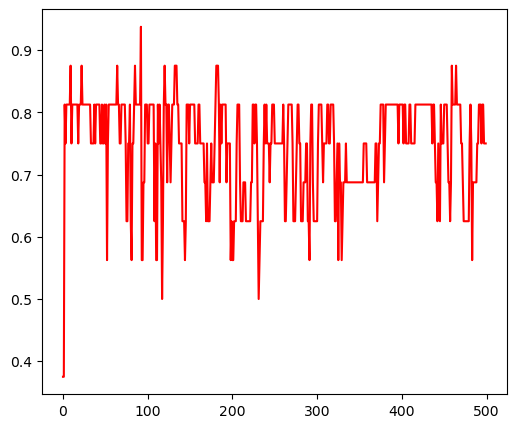

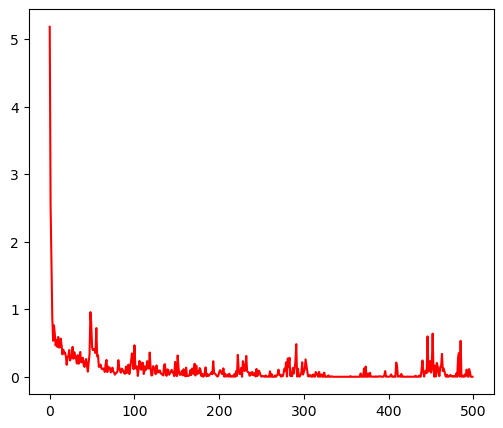

In [26]:
best_accuracy = 0
test1 = np.zeros(500)
loss1 = np.zeros(500)
for epoch in range(500):
    running_loss = 0.0
    train_acc = 0.0
    for step, (batch_image, batch_label) in enumerate(train_loader):
        model.train()
        batch_image, batch_label = batch_image.to(device), batch_label.to(device)
        #batch_output = batch_output.to(device)
        batch_output = model(batch_image)
        batch_loss = loss_func(batch_output, batch_label)

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

        running_loss += batch_loss.item()

        # train accuracy
        _, train_predicted = torch.max(batch_output.data, 1)
        train_acc += (train_predicted == batch_label).sum().item()

    train_acc /= train_size
    running_loss /= (step+1)

    # ----------test----------
    model.eval()
    test_acc = 0.0
    for test_image, test_label in test_loader:
        test_image, test_label = test_image.to(device), test_label.to(device)
        test_output = model(test_image)
        _, predicted = torch.max(test_output.data, 1)
        test_acc += (predicted == test_label).sum().item()
    test_acc /= test_size

    print('epoch={:d}\ttrain loss={:.6f}\ttrain accuracy={:.3f}\ttest accuracy={:.3f}'.format(
        epoch, running_loss, train_acc, test_acc))
    test1[epoch] = test_acc
    loss1[epoch] = running_loss

    if test_acc >= best_accuracy:
        torch.save(model.state_dict(), './CNN_model.pkl')
        best_accuracy = test_acc
plt.figure(figsize=(6, 5))
plt.plot(test1,'red')
plt.figure(figsize=(6, 5))
plt.plot(loss1,'red')